In [55]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import os

In [74]:
home47 = pd.read_csv('ind_homes\home_home47.csv')

In [75]:
home47.shape

(6440, 22)

In [76]:
print(home47.isnull().sum())

timestamp                                                             0
home47_bathroom652_sensor1198_room_light                              2
home47_bathroom652_sensor1199_room_humidity                           2
home47_bathroom652_sensor1200_room_temperature                        2
home47_bedroom653_sensor1203_room_light                              38
home47_bedroom653_sensor1204_room_humidity                           41
home47_bedroom653_sensor1205_room_temperature                        41
home47_hall654_sensor1208_room_light                                  1
home47_hall654_sensor1209_room_humidity                               1
home47_hall654_sensor1210_room_temperature                            1
home47_hall654_sensor1216c1220_electric-mains_electric-combined       9
home47_hall654_sensor1221_gas-pulse_gas                            4303
home47_kitchen650_sensor1174_room_light                             129
home47_kitchen650_sensor1175_room_humidity                      

In [16]:
missing_rows = home47[home47.isnull().any(axis=1)]
missing_rows

,timestamp,home47_bathroom652_sensor1198_room_light,home47_bathroom652_sensor1199_room_humidity,home47_bathroom652_sensor1200_room_temperature,home47_bedroom653_sensor1203_room_light,home47_bedroom653_sensor1204_room_humidity,home47_bedroom653_sensor1205_room_temperature,home47_hall654_sensor1208_room_light,home47_hall654_sensor1209_room_humidity,home47_hall654_sensor1210_room_temperature,...,home47_kitchen650_sensor1174_room_light,home47_kitchen650_sensor1175_room_humidity,home47_kitchen650_sensor1176_room_temperature,home47_kitchen650_sensor1182_tempprobe_hot-water-cold-pipe,home47_kitchen650_sensor1183_tempprobe_hot-water-hot-pipe,home47_kitchen650_sensor1189_tempprobe_central-heating-return,home47_kitchen650_sensor1190_tempprobe_central-heating-flow,home47_livingroom651_sensor1193_room_light,home47_livingroom651_sensor1194_room_humidity,home47_livingroom651_sensor1195_room_temperature
0,2016-08-10 09:00:00,178.0,446.0,248.0,NaN,NaN,NaN,NaN,NaN,NaN,...,243.0,415.0,231.0,216.0,355.0,263.0,271.0,199.0,419.0,232.0
1,2016-08-10 10:00:00,95.0,468.0,228.0,103.0,481.0,205.0,24.0,468.0,216.0,...,139.0,451.0,218.0,207.0,347.0,263.0,281.0,81.0,446.0,220.0
2,2016-08-10 11:00:00,1.0,553.0,211.0,71.0,532.0,199.0,14.0,512.0,210.0,...,92.0,521.0,219.0,217.0,351.0,290.0,292.0,62.0,494.0,217.0
3,2016-08-10 12:00:00,3.0,573.0,207.0,72.0,557.0,199.0,14.0,532.0,207.0,...,84.0,512.0,219.0,219.0,295.0,252.0,257.0,56.0,508.0,215.0
4,2016-08-10 13:00:00,1.0,556.0,204.0,67.0,552.0,200.0,13.0,532.0,204.0,...,81.0,505.0,216.0,225.0,239.0,234.0,234.0,52.0,510.0,212.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6435,2017-05-08 16:00:00,2.0,469.0,189.0,15.0,436.0,195.0,3.0,447.0,190.0,...,49.0,457.0,189.0,190.0,190.0,NaN,190.0,6.0,449.0,190.0
6436,2017-05-08 17:00:00,1.0,481.0,187.0,0.0,454.0,189.0,0.0,464.0,186.0,...,39.0,462.0,188.0,NaN,NaN,NaN,NaN,4.0,462.0,187.0
6437,2017-05-08 18:00:00,1.0,532.0,184.0,0.0,503.0,186.0,1.0,514.0,183.0,...,25.0,499.0,187.0,NaN,NaN,NaN,NaN,2.0,511.0,184.0
6438,2017-05-08 19:00:00,0.0,559.0,182.0,0.0,527.0,184.0,0.0,538.0,181.0,...,14.0,547.0,189.0,NaN,NaN,NaN,NaN,0.0,536.0,183.0


In [28]:
home47['timestamp'] = pd.to_datetime(home47['timestamp'])

In [31]:
missing_in_specific_cols = home47[home47[['home47_hall654_sensor1221_gas-pulse_gas']].isnull().any(axis=1)]
missing_in_specific_cols


,timestamp,home47_bathroom652_sensor1198_room_light,home47_bathroom652_sensor1199_room_humidity,home47_bathroom652_sensor1200_room_temperature,home47_bedroom653_sensor1203_room_light,home47_bedroom653_sensor1204_room_humidity,home47_bedroom653_sensor1205_room_temperature,home47_hall654_sensor1208_room_light,home47_hall654_sensor1209_room_humidity,home47_hall654_sensor1210_room_temperature,...,home47_kitchen650_sensor1174_room_light,home47_kitchen650_sensor1175_room_humidity,home47_kitchen650_sensor1176_room_temperature,home47_kitchen650_sensor1182_tempprobe_hot-water-cold-pipe,home47_kitchen650_sensor1183_tempprobe_hot-water-hot-pipe,home47_kitchen650_sensor1189_tempprobe_central-heating-return,home47_kitchen650_sensor1190_tempprobe_central-heating-flow,home47_livingroom651_sensor1193_room_light,home47_livingroom651_sensor1194_room_humidity,home47_livingroom651_sensor1195_room_temperature
0,2016-08-10 09:00:00,178.0,446.0,248.0,NaN,NaN,NaN,NaN,NaN,NaN,...,243.0,415.0,231.0,216.0,355.0,263.0,271.0,199.0,419.0,232.0
1,2016-08-10 10:00:00,95.0,468.0,228.0,103.0,481.0,205.0,24.0,468.0,216.0,...,139.0,451.0,218.0,207.0,347.0,263.0,281.0,81.0,446.0,220.0
2,2016-08-10 11:00:00,1.0,553.0,211.0,71.0,532.0,199.0,14.0,512.0,210.0,...,92.0,521.0,219.0,217.0,351.0,290.0,292.0,62.0,494.0,217.0
3,2016-08-10 12:00:00,3.0,573.0,207.0,72.0,557.0,199.0,14.0,532.0,207.0,...,84.0,512.0,219.0,219.0,295.0,252.0,257.0,56.0,508.0,215.0
4,2016-08-10 13:00:00,1.0,556.0,204.0,67.0,552.0,200.0,13.0,532.0,204.0,...,81.0,505.0,216.0,225.0,239.0,234.0,234.0,52.0,510.0,212.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6434,2017-05-08 15:00:00,0.0,476.0,187.0,123.0,433.0,196.0,17.0,445.0,189.0,...,62.0,456.0,188.0,190.0,190.0,NaN,188.0,63.0,454.0,188.0
6435,2017-05-08 16:00:00,2.0,469.0,189.0,15.0,436.0,195.0,3.0,447.0,190.0,...,49.0,457.0,189.0,190.0,190.0,NaN,190.0,6.0,449.0,190.0
6436,2017-05-08 17:00:00,1.0,481.0,187.0,0.0,454.0,189.0,0.0,464.0,186.0,...,39.0,462.0,188.0,NaN,NaN,NaN,NaN,4.0,462.0,187.0
6438,2017-05-08 19:00:00,0.0,559.0,182.0,0.0,527.0,184.0,0.0,538.0,181.0,...,14.0,547.0,189.0,NaN,NaN,NaN,NaN,0.0,536.0,183.0


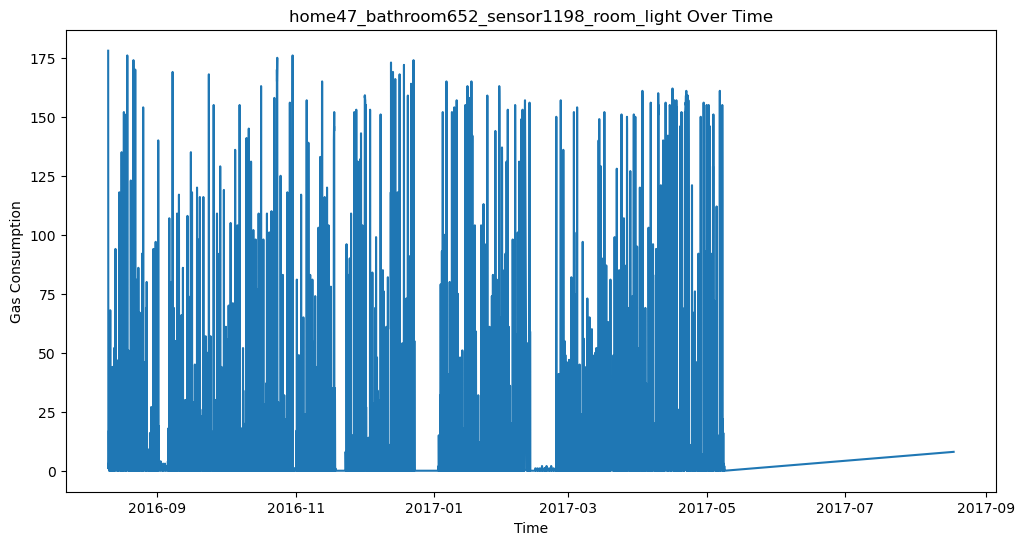

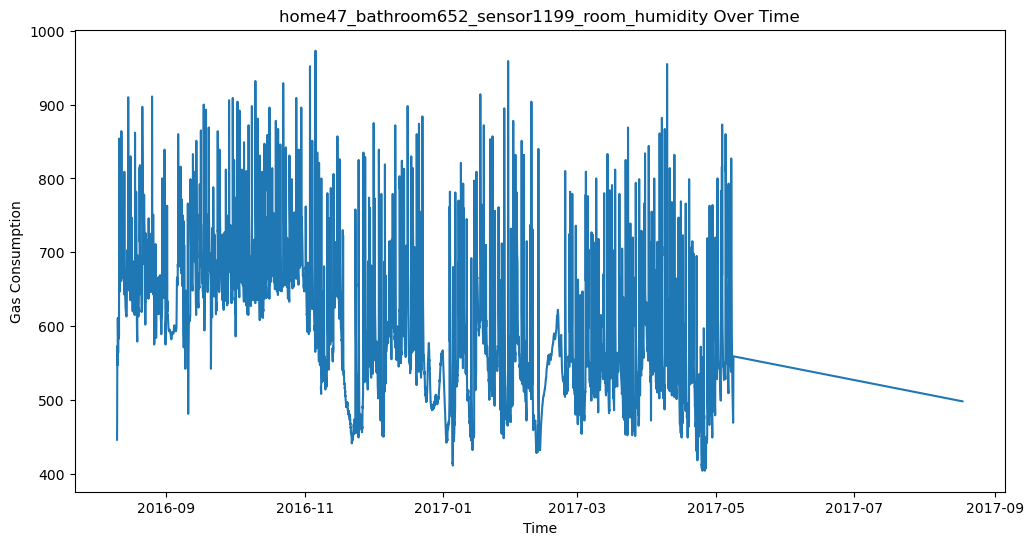

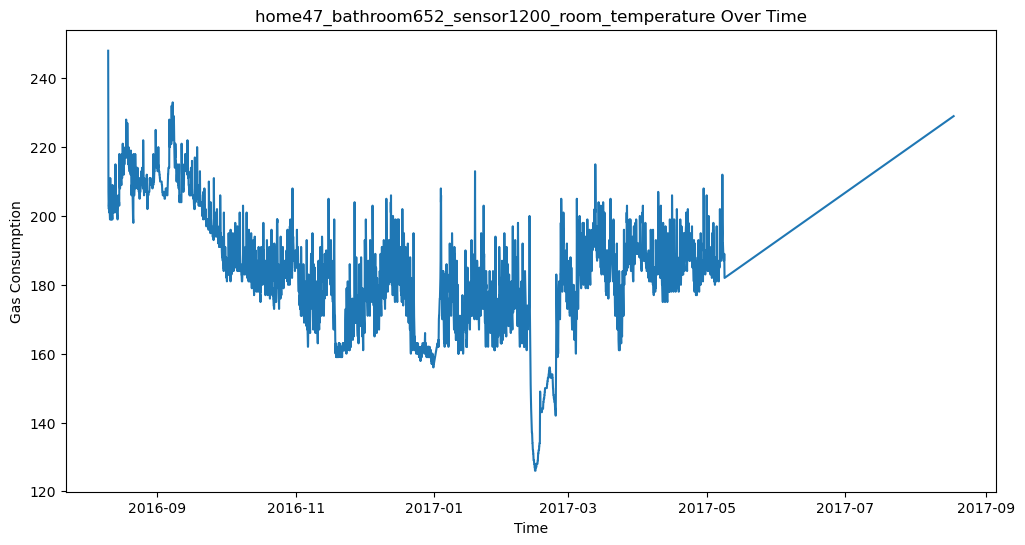

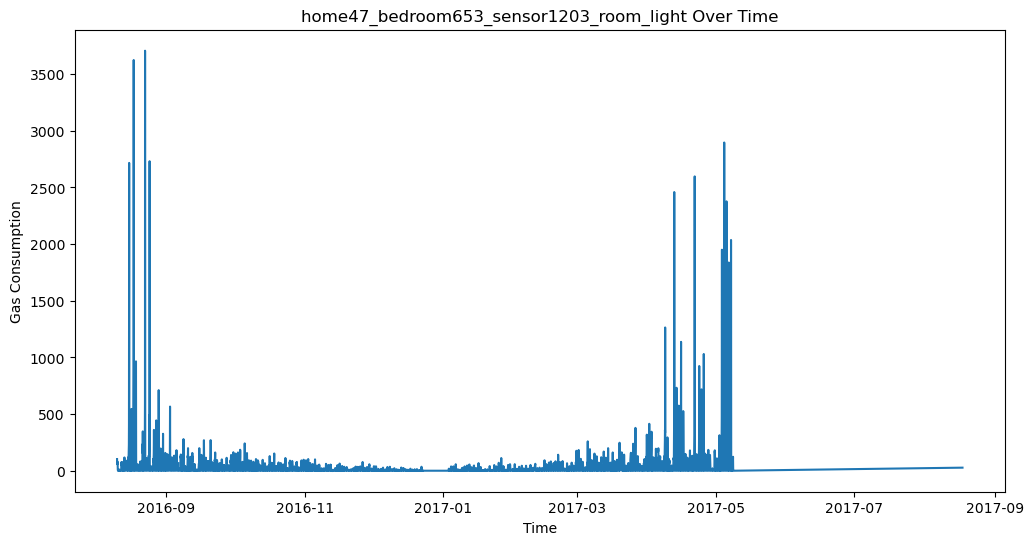

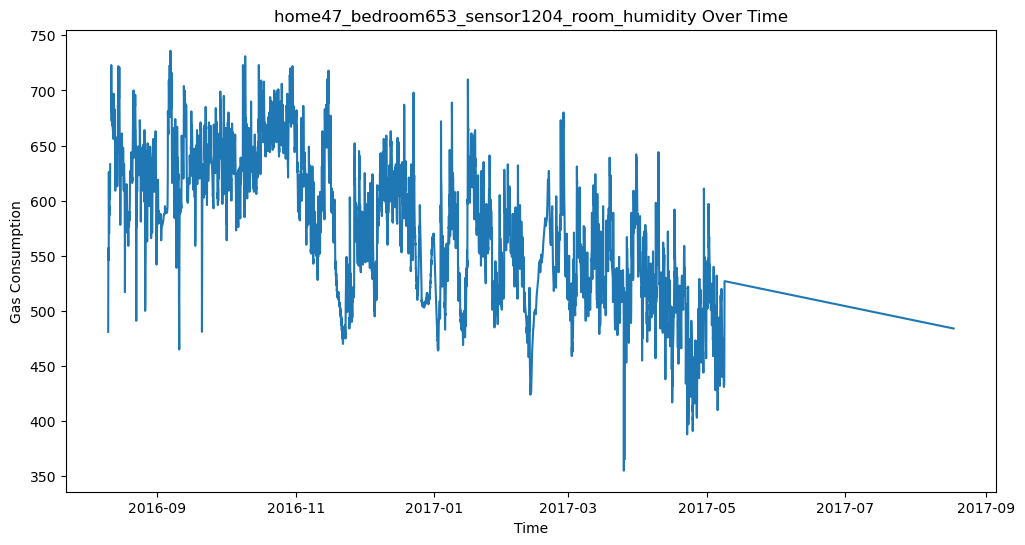

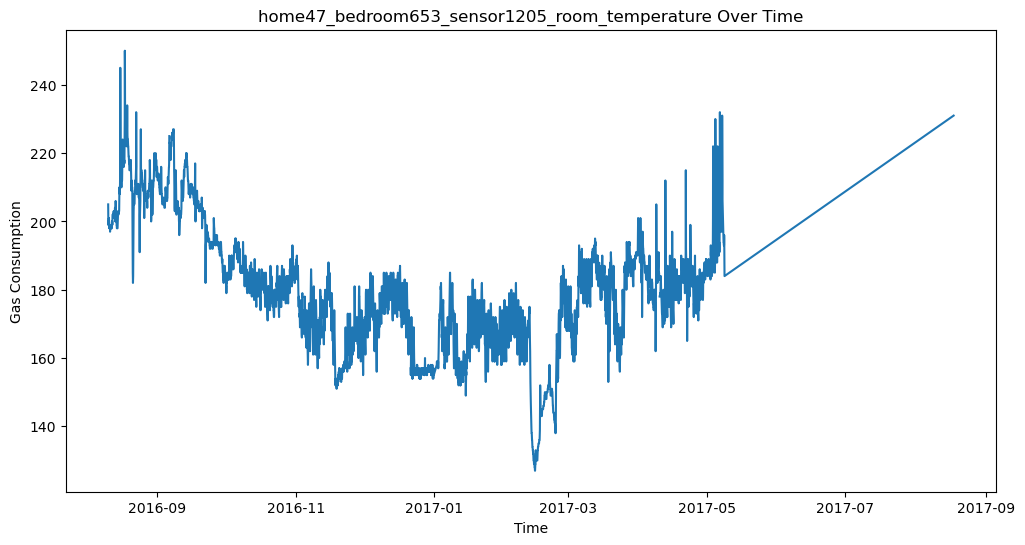

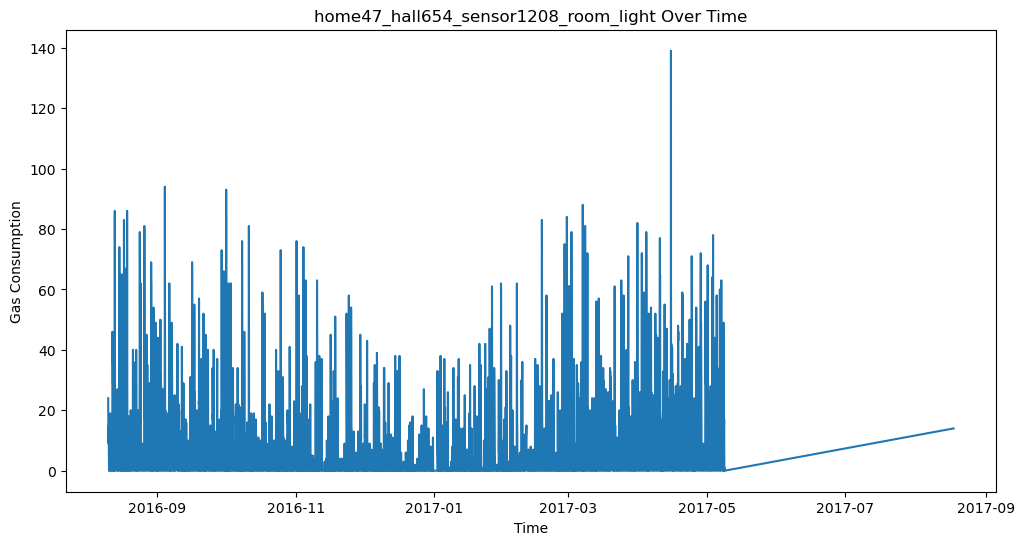

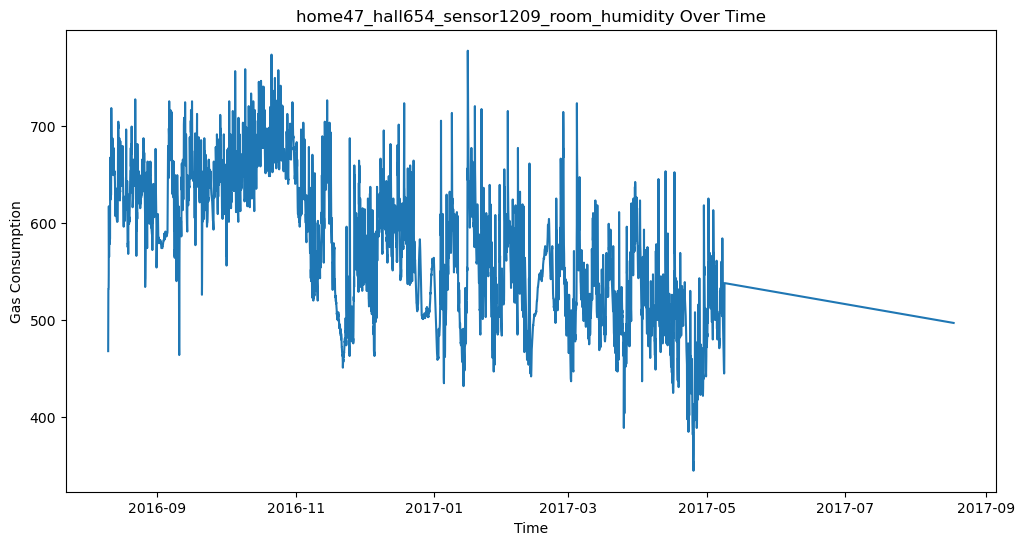

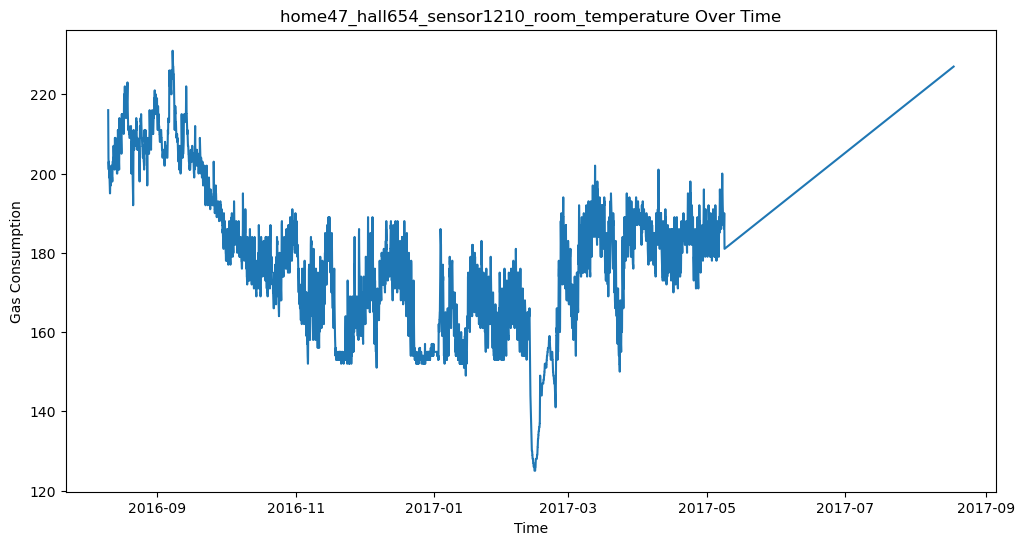

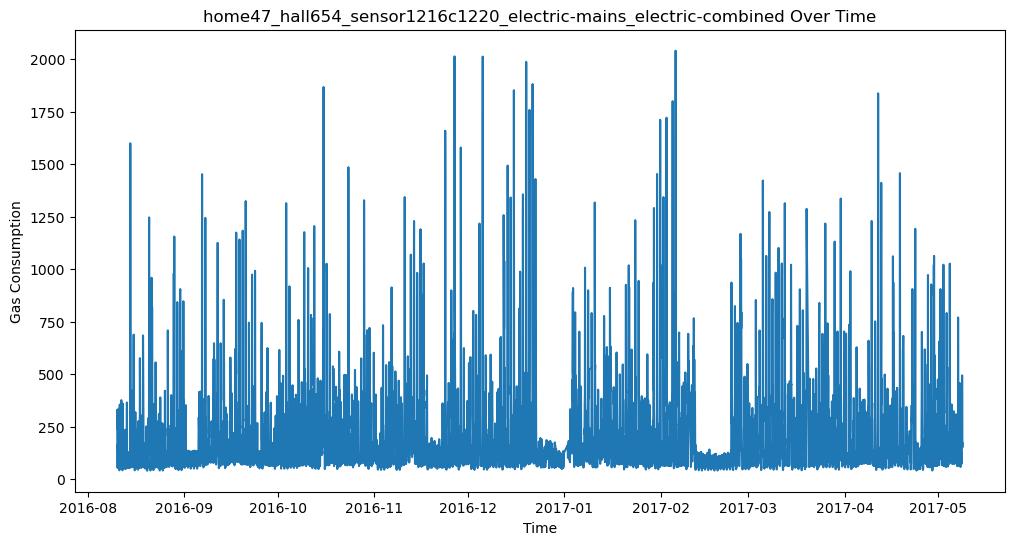

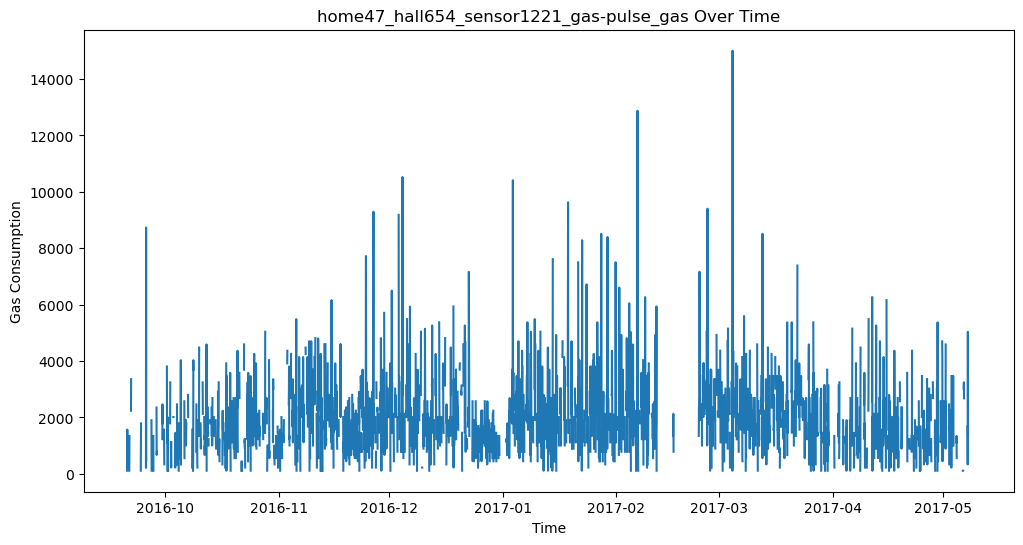

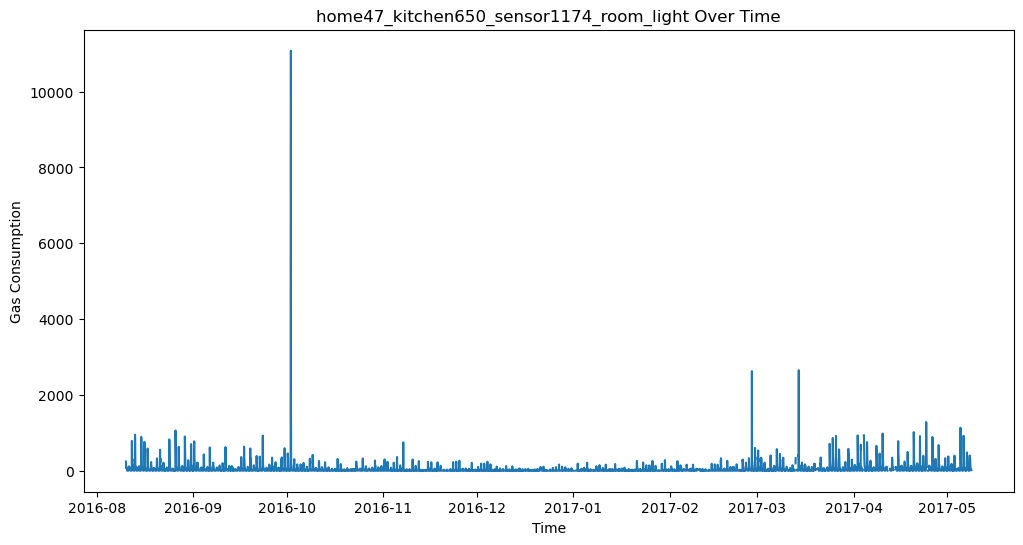

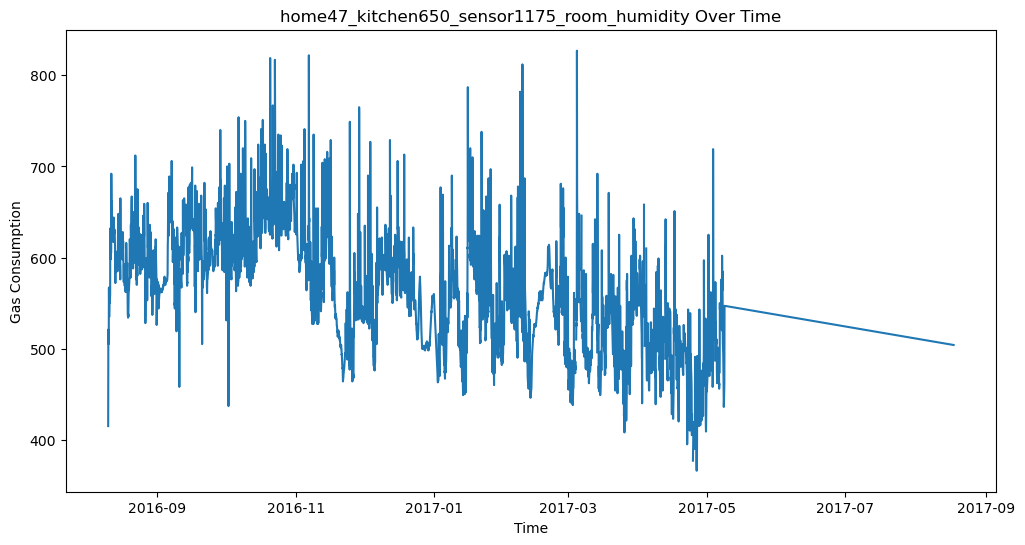

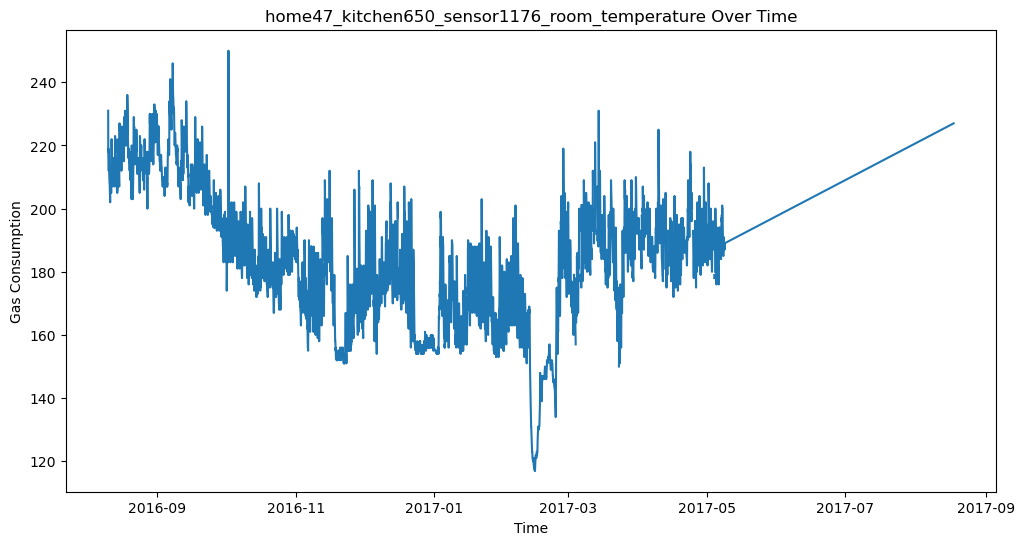

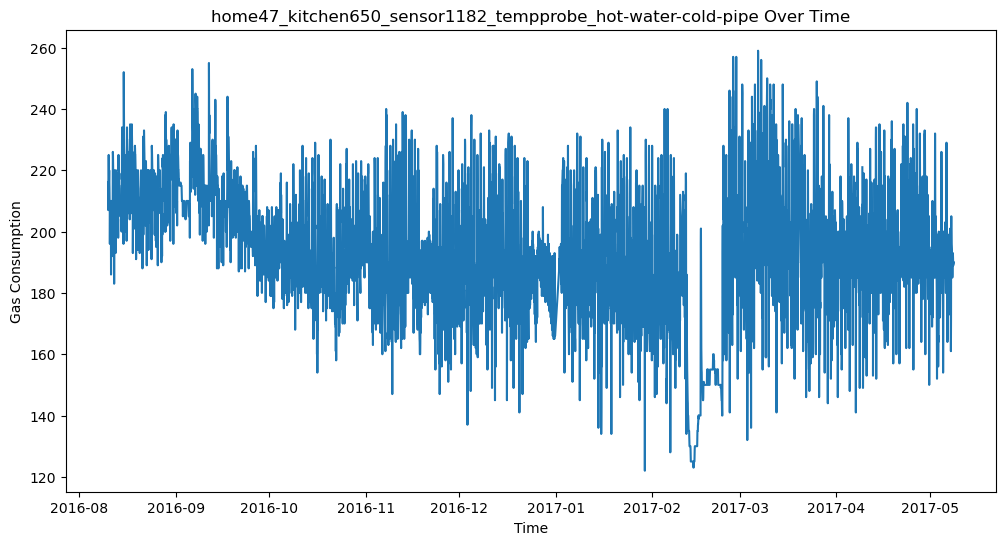

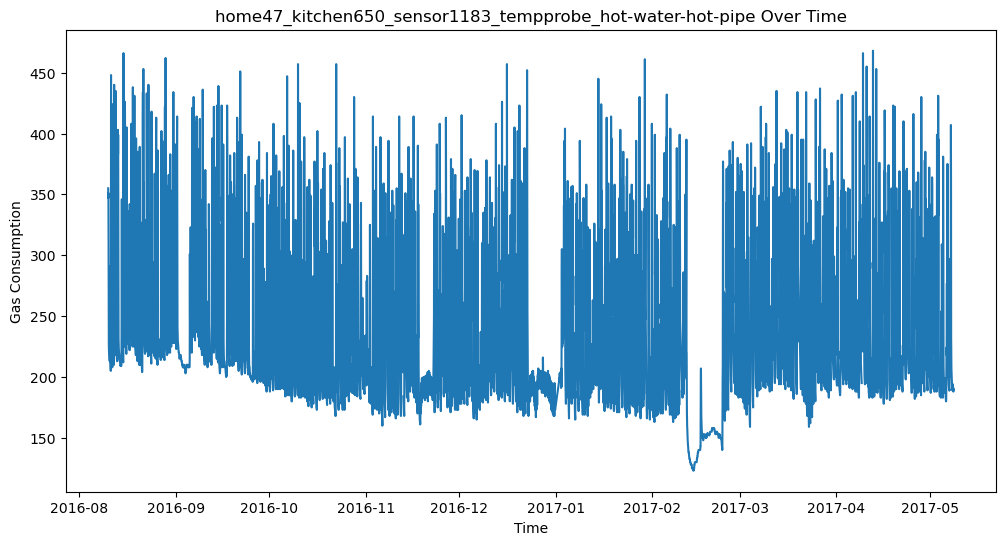

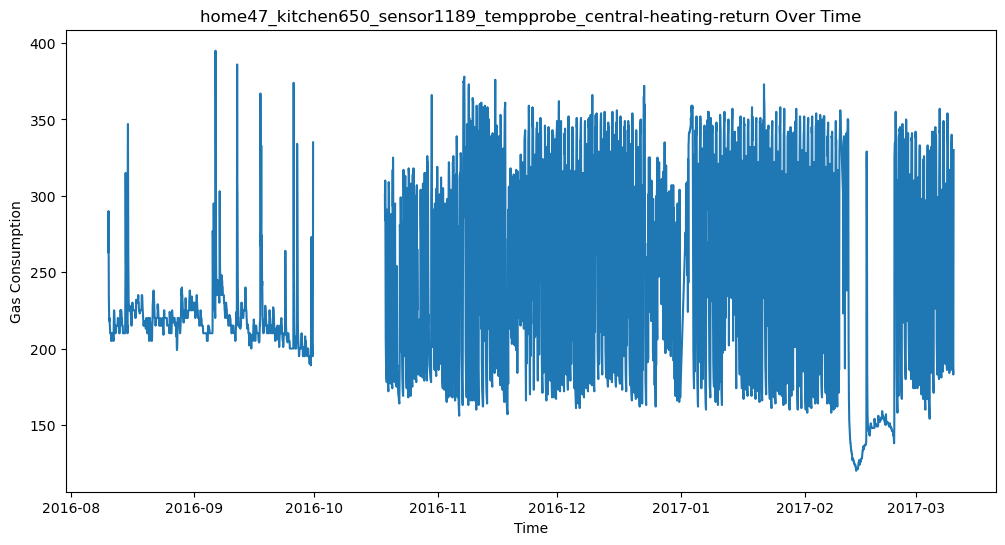

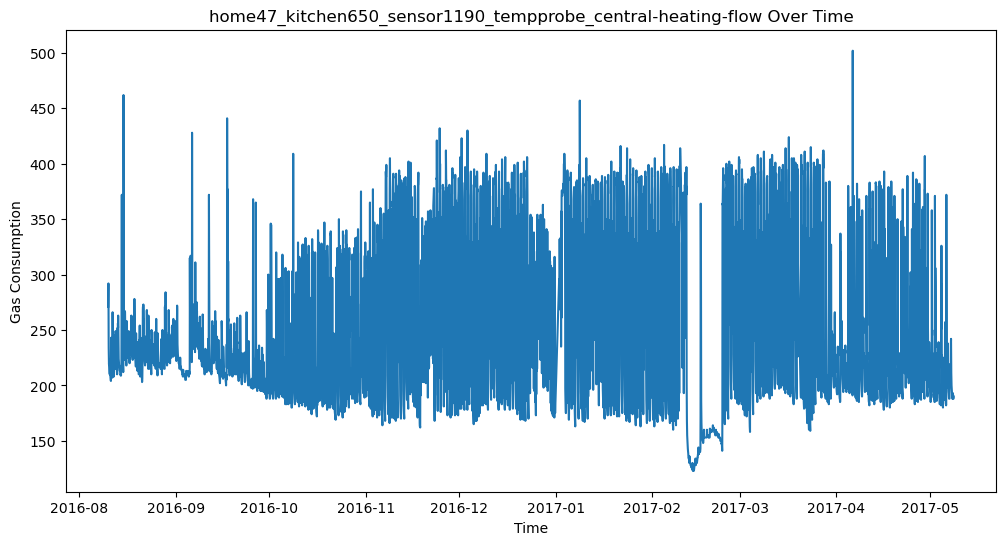

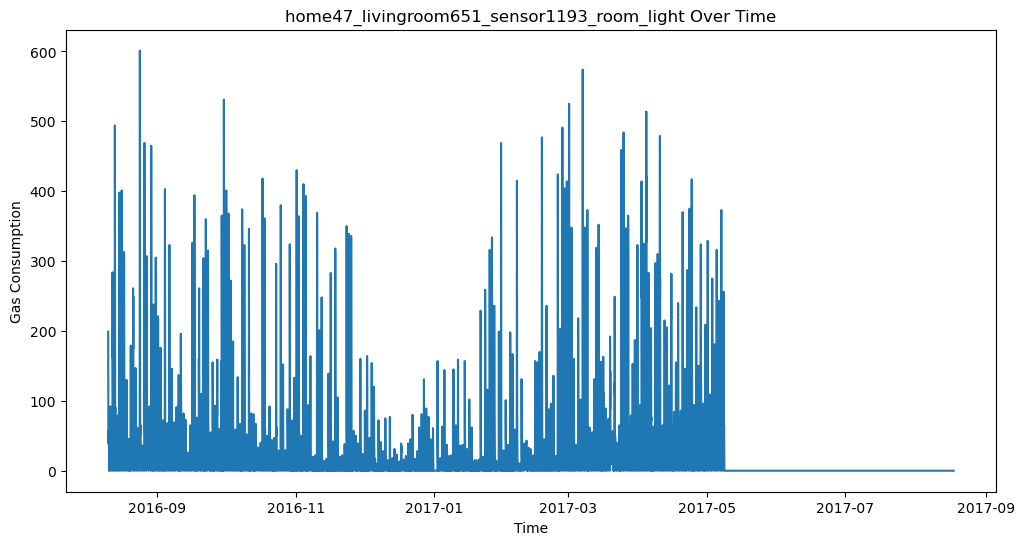

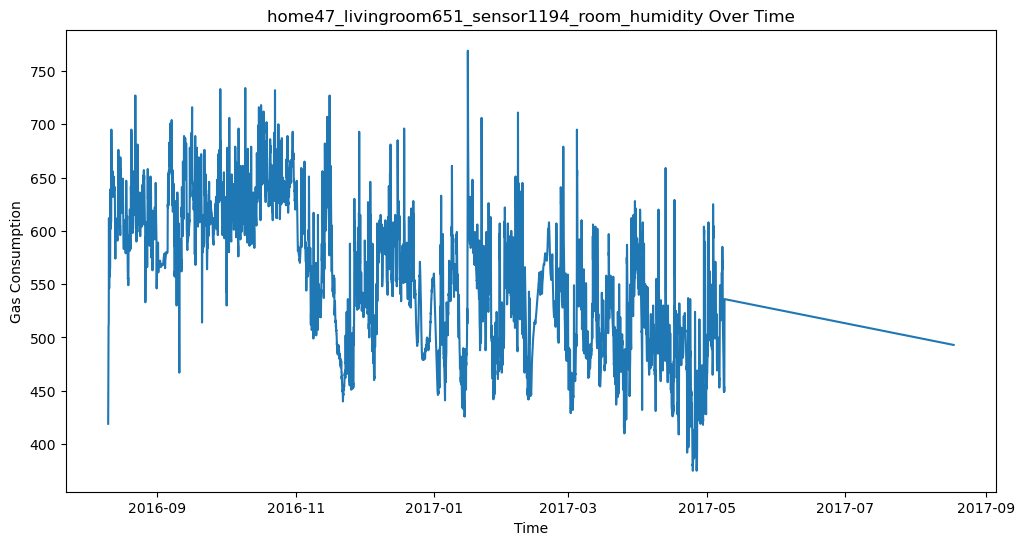

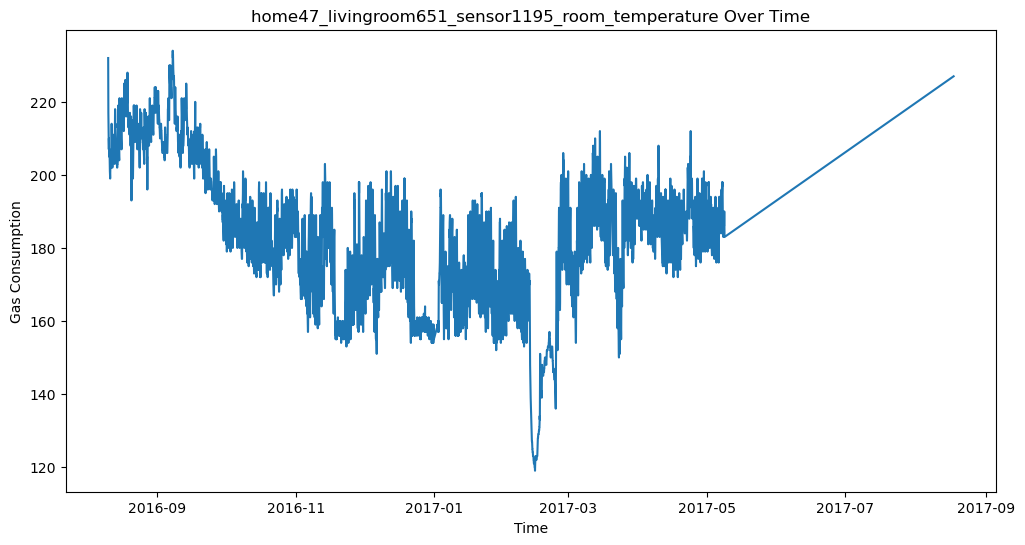

In [ ]:
for col in home47.columns:
    if col != 'timestamp':
        plt.figure(figsize=(12, 6)) 
        plt.plot(home47['timestamp'], home47[col]) 
        plt.title(f'{col} Over Time')  
        plt.xlabel('Time')  
        plt.ylabel('Gas Consumption') 
        plt.show() 

In [71]:
directory = r'C:\Users\ggeor\Desktop\Group Projects\ML-Project\George\ind_homes'

missing_data = []

for file_name in os.listdir(directory):
    if file_name.endswith('.csv'): 
        
        file_path = os.path.join(directory, file_name)
        
        df = pd.read_csv(file_path)
        
        gas_column = [col for col in df.columns if col.endswith('gas')]
        home_name = file_name.split('_')[1].replace('.csv', '')
        home_missing = {}
        home_missing = {'Home': home_name}
            
        if gas_column: 
            gas_column = gas_column[0]
        
            missing_percentage = df[gas_column].isnull().mean() * 100
          
            home_name = file_name.split('_')[1].replace('.csv', '')  
    
            missing_data.append({'Home': home_name, 'Missing Percentage': missing_percentage, 'Number of Observations': len(df)})

missing_df = pd.DataFrame(missing_data)

print(missing_df)


        Home  Missing Percentage  Number of Observations
0    home100           18.574630                   11155
1    home101           77.598026                   10941
2    home102           79.386479                   10236
3    home105           81.380774                    9893
4    home106           53.115218                    9903
..       ...                 ...                     ...
250   home94           59.064530                   11545
251   home96           66.238964                    8495
252   home97           16.399584                    9610
253   home98           43.266855                   11332
254   home99           70.341343                    9697

[255 rows x 3 columns]


In [72]:
missing_df = missing_df.sort_values(by='Missing Percentage', ascending=True)

In [73]:
missing_df

,Home,Missing Percentage,Number of Observations
132,home248,1.302032,5069
89,home202,3.890989,6348
205,home325,6.724611,2186
141,home257,7.091737,4611
51,home161,9.401597,7637
...,...,...,...
39,home149,94.127004,8173
120,home236,95.694539,4413
37,home147,96.957157,8216
243,home86,98.904391,11683
